# <div style="color:white;display:fill;border-radius:5px;background-color:#60e945;font-family:Didot;overflow:hidden"><p style="padding:20px;color:Black;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b></b>TELECOM CUSTOMER CHURN</p></div>
<a id=""></a>
**By-Abhishek Kumar**

# Table of Contents

* [1. Introduction and Dataset](#1)
* [2. Basic Libraries and File Imports](#2)
* [3. Exploratory Data Analysis](#3)
* [4. Feature Transformation](#4)
* [5. Data Visualisation](#5)
 * [6. Feature Engineering](#6)
 * [7.Train Test Split And Scaling Method](#7)
 * [8.Machine Learning Models](#8)
* [9. Final Prediction](#9)
* [10. Conclusion](#10)

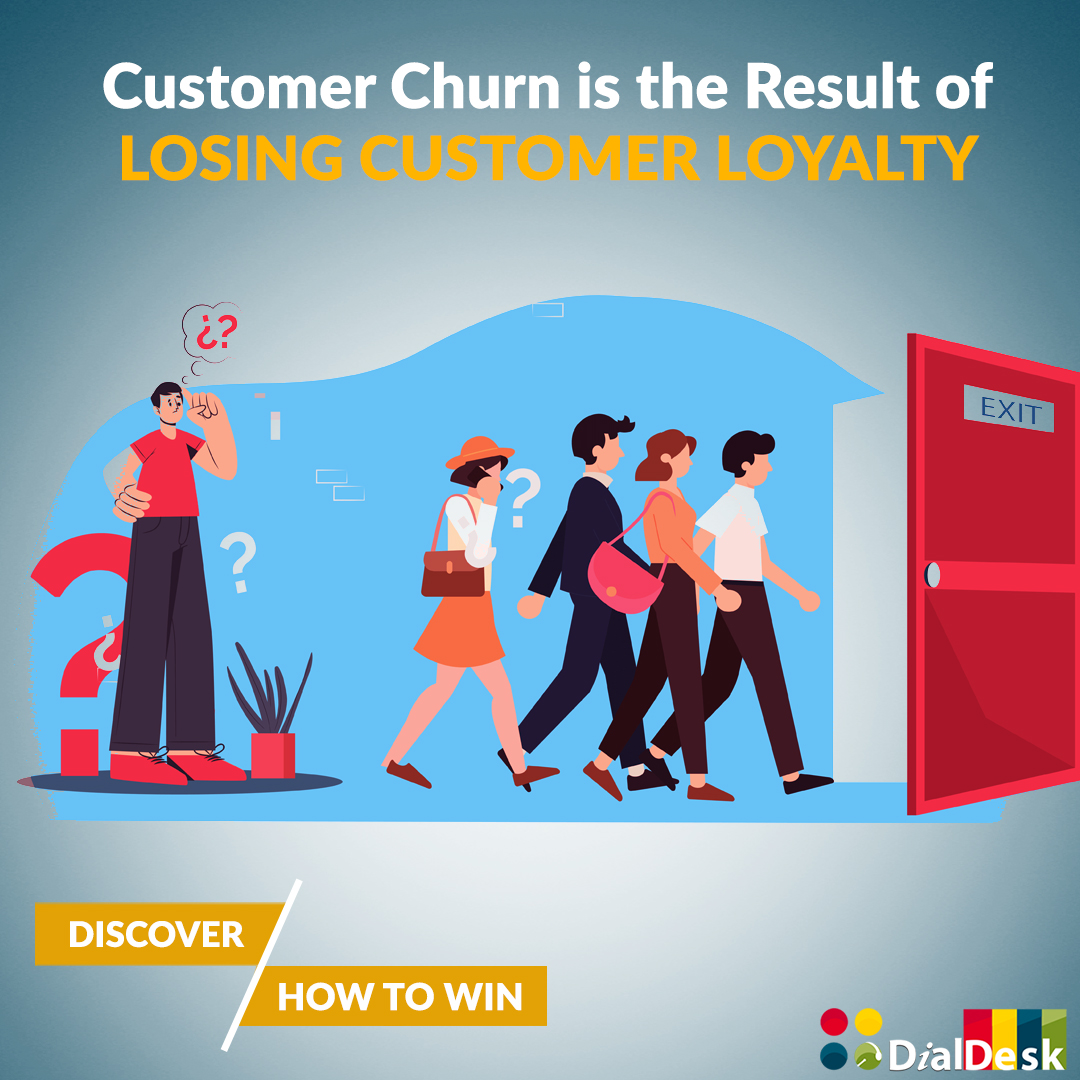

# <div style="color:white;display:fill;border-radius:5px;background-color:#60e945;font-family:Didot;overflow:hidden"><p style="padding:20px;color:Black;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>1 |</b> Introduction and Dataset</p></div>
<a id="1"></a>

# <font color=#60e945>Introduction</font>
Develop a predictive model to identify customers who are likely to churn (cancel their subscriptions) for a telecommunications company. This will help the company take proactive measures to retain valuable customers.

# <font color=#60e945>Dataset</font>
The data set used in this article is available in the Kaggle (CC BY-NC-ND) and contains nineteen columns (independent variables) that indicate the characteristics of the clients of a fictional telecommunications corporation. The Churn column (response variable) indicates whether the customer departed within the last month or not. The class No includes the clients that did not leave the company last month, while the class Yes contains the clients that decided to terminate their relations with the company. The objective of the analysis is to obtain the relation between the customer’s characteristics and the churn.


&nbsp;&nbsp;&nbsp;&nbsp;Kaggle Dataset: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://www.kaggle.com/datasets/mirzahasnine/telecom-churn-dataset<br>



**Customer churn is defined by losing customers or clients.**

Which as in overall companies like mention here telephone companies pay numerous amount of money to explore the possible reasons and causes to customers churning from the company as for voluntary causes such as customer decides to leave or go for another service provider or involuntary cause which can be due to natural causes that prevent the customer from continuing his/her subscriptions, as in overall spending capital over how to keep customers satisfied and committing to the company is often less costly than exploring new ways to get new customers to replace old ones.

What we’ll be Discussing through this project is the various type of customers and how the process of their subscription went through out and how that affects the future state of customers on the long term and understand analysis of the problem.

# <div style="color:white;display:fill;border-radius:5px;background-color:#60e945;font-family:Didot;overflow:hidden"><p style="padding:20px;color:Black;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>2 |</b> Basic Libraries and File Imports</p></div>
<a id="2"></a>

In [1]:
# Dataframe Manipulation and Analysis Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

#For Encoding
from sklearn import preprocessing

#Train test split and scaling methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



# <font color=32CD32>Load Dataset</font>


In [2]:
df=pd.read_excel(r"C:\Users\USER\Downloads\Telecom Churn Rate Dataset.xlsx")#df is name given to the dataset

In [3]:
df.head()#Check top 5 rows

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
0,Male,Yes,No,No,1,No,No phone service,DSL,No,No,...,No,Yes,Month-to-month,Yes,Electronic check,396.5,4758,0,0,Yes
1,Female,Yes,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,...,No,No,Two year,Yes,Credit card (automatic),963.5,11562,0,0,No
2,Male,Yes,Yes,No,2,Yes,No,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),955.0,11460,0,0,No
3,Male,Yes,No,No,1,Yes,No,DSL,No,No,...,No,No,Month-to-month,No,Bank transfer (automatic),452.5,5430,0,0,No
4,Female,Yes,No,No,43,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Electronic check,902.5,10830,0,0,No


In [4]:
df.tail()#Check 5 buttom rows

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
1137,Female,Yes,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,1035.0,12420,0,0,No
1138,Female,Yes,No,No,6,No,No phone service,DSL,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,444.0,5328,0,0,No
1139,Male,Yes,Yes,No,55,Yes,Yes,DSL,Yes,Yes,...,No,No,One year,No,Credit card (automatic),600.0,7200,0,0,No
1140,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,757.5,9090,0,0,Yes
1141,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,744.0,8928,0,0,Yes


# <div style="color:white;display:fill;border-radius:5px;background-color:#60e945;font-family:Didot;overflow:hidden"><p style="padding:20px;color:Black;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>3 |</b>EDA(Exporatory Data Analysis) And Data Preprocessing </p></div>
<a id="3"></a>

&nbsp;&nbsp;&nbsp;&nbsp;**Official Documentation Of EDA**: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/exploratory-data-analysis-eda-visualization-using-pandas-ca5a04271607<br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;https://www.analyticsvidhya.com/blog/2021/03/pandas-functions-for-data-analysis-and-manipulation/<br>



In [5]:
# visualize column names
df.columns

Index(['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paper_less_Billing',
       'Payment_Method', 'Monthly_Charges', 'Yearly_Charge', 'Admin_Tickets',
       'Tech_Tickets', 'Churn'],
      dtype='object')

In [6]:
#Check shape of the dataset
df.shape

(1142, 22)

In [7]:
#Check detailed information about datasets
#The information contains the no of col,col labels,and col datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1142 non-null   object 
 1   Senior_Citizen      1142 non-null   object 
 2   Partner             1142 non-null   object 
 3   Dependents          1142 non-null   object 
 4   Tenure              1142 non-null   int64  
 5   Phone_Service       1142 non-null   object 
 6   Multiple_Lines      1142 non-null   object 
 7   Internet_Service    1142 non-null   object 
 8   Online_Security     1142 non-null   object 
 9   Online_Backup       1142 non-null   object 
 10  Device_Protection   1142 non-null   object 
 11  Tech_Support        1142 non-null   object 
 12  Streaming_TV        1142 non-null   object 
 13  Streaming_Movies    1142 non-null   object 
 14  Contract            1142 non-null   object 
 15  Paper_less_Billing  1142 non-null   object 
 16  Paymen

Analysis-

1-There is no null value within a columns

2-There are 22 features are There

3-There are 1142 rows present in the dataset

4-Intergers columns-['Tenure','Yearly Charge','Admin_tickets','Tech tickets']
  
  Characters columns-['Gender','Senior Citizen','partners','Dependents','Phone service','Multiple lines','Internet services','Online security','Online Backup','Device protection','Tech support','Stremming Tv','stremming movies','Contract','Paperless billing','payment method','Churn']
 
  Float columns-[Monthly Charges]

In [8]:
# check unique values of all columns
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*70)

Gender
['Male' 'Female']
----------------------------------------------------------------------
Senior_Citizen
['Yes']
----------------------------------------------------------------------
Partner
['No' 'Yes']
----------------------------------------------------------------------
Dependents
['No' 'Yes']
----------------------------------------------------------------------
Phone_Service
['No' 'Yes']
----------------------------------------------------------------------
Multiple_Lines
['No phone service' 'Yes' 'No']
----------------------------------------------------------------------
Internet_Service
['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------
Online_Security
['No' 'Yes' 'No internet service']
----------------------------------------------------------------------
Online_Backup
['No' 'Yes' 'No internet service']
----------------------------------------------------------------------
Device_Protection
['Yes' 'No' 'No internet service

# <font color=32CD32>Dropping Features(Remove columns)</font>
 

**I have dropped those columns which dont have much impact about dataset**

In [9]:
df = df.drop(['Senior_Citizen','Partner','Dependents'],  axis = 1)

In [10]:
df = df.drop(['Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support'],axis = 1)

In [11]:
df = df.drop(["Streaming_TV", "Streaming_Movies", "Contract", "Paper_less_Billing", "Payment_Method"], axis = 1)

In [12]:
df.head()#After dropping the columns the table as given are-

,Gender,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
0,Male,1,No,No phone service,DSL,396.5,4758,0,0,Yes
1,Female,71,Yes,Yes,Fiber optic,963.5,11562,0,0,No
2,Male,2,Yes,No,Fiber optic,955.0,11460,0,0,No
3,Male,1,Yes,No,DSL,452.5,5430,0,0,No
4,Female,43,Yes,Yes,Fiber optic,902.5,10830,0,0,No


**Value Counts Of Different Columns**

In [13]:
df['Gender'].value_counts() 

Male      574
Female    568
Name: Gender, dtype: int64

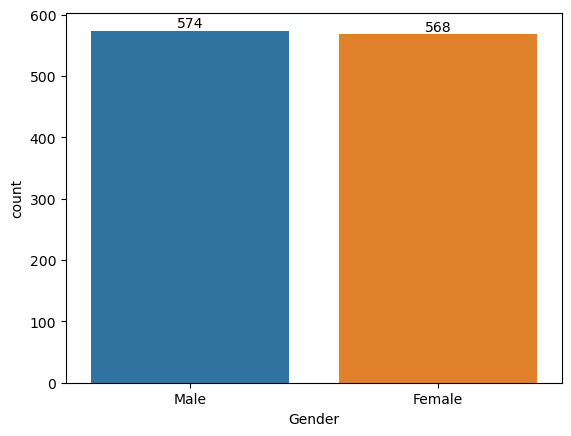

In [14]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:      #Gender column visualisation
    ax.bar_label(bars)

In [15]:
df['Phone_Service'].value_counts() 

Yes    1038
No      104
Name: Phone_Service, dtype: int64

In [16]:
df['Multiple_Lines'].value_counts()

Yes                 665
No                  373
No phone service    104
Name: Multiple_Lines, dtype: int64

In [17]:
df['Internet_Service'].value_counts()

Fiber optic    831
DSL            259
No              52
Name: Internet_Service, dtype: int64

In [18]:
df['Churn'].value_counts()

No     666
Yes    476
Name: Churn, dtype: int64

**Analysis**

1-On the basis of multiple columns the m0ost of the peoples are using telecom services,the ratio of used services is higher
  than no of peoples not used service

2-Expect Churn condition the no of possibilities is higher than 'Yes'

3-On the basis of this data we conclude than some factors are responsible to affect churn so lets find out 

**Check Null Values And Duplicate Values**

In [19]:
df.isnull().sum().sum() #check for any null values present of the dataset 

0

In [20]:
df.duplicated().sum() #Check for any duplicate value are there-we found 4 duplicate values

4

In [21]:
df.drop_duplicates(inplace=True) #remove Duplicate vaules

In [22]:
df.duplicated().sum() # all duplicate value clear

0

# Important Instructions about Statistics

**Let Take Some Statistical Information regarding dataset**

**Basic Statistic details about the data**

**1-count tells us the no 0f NON-empty rows in a feature**

**2-mean tells us the mean value of tht feature**

**3-std tells us the standard Deviation Value of that feature.**

**4-min tells us the minimum value of that feature**

**5-25%,50%,and 75% are the percentile/Quartile of each features.This Quartile informed help us to detect outliers**

**6-max tells us the maximum value of tht feature**

In [23]:
df.describe(include='object') #only shoes Charater values

,Gender,Phone_Service,Multiple_Lines,Internet_Service,Churn
count,1138,1138,1138,1138,1138
unique,2,2,3,3,2
top,Male,Yes,Yes,Fiber optic,No
freq,573,1034,662,827,664


In [24]:
df.corr()#finding correlation betwwen the col 

C:\Users\USER\AppData\Local\Temp\ipykernel_2548\937841116.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()#finding correlation betwwen the col


,Tenure,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets
Tenure,1.000000,0.265063,0.265063,0.026291,0.255538
Monthly_Charges,0.265063,1.000000,1.000000,0.012980,0.258656
Yearly_Charge,0.265063,1.000000,1.000000,0.012980,0.258656
Admin_Tickets,0.026291,0.012980,0.012980,1.000000,-0.029519
Tech_Tickets,0.255538,0.258656,0.258656,-0.029519,1.000000


**Analysis:-**

1-On the basis of that columns are mostly highly positive correlated to each other

2-Admin Tickets are negative correlation with tech tickets

# <div style="color:white;display:fill;border-radius:5px;background-color:#60e945;font-family:Didot;overflow:hidden"><p style="padding:20px;color:Black;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>4 |</b>Feature Transformation</p></div>
<a id="4"></a>
 

&nbsp;&nbsp;&nbsp;&nbsp;**Official Documentation Of Feature Transformation:** <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/apache-spark-mllib-tutorial-7aba8a1dce6e<br>
 

# Transformation
- Tranformation changes the distribution of data. It also helps to decrease the skewness in distrunition specially one with outliers
- So whenever we want to remove skweness or make distribution normal, we can go with transformation.
- It improves the linearity between dependent and independent variables. 
- It boost the validity of stastitical analysis
- When you apply a square root transformation to a variable, high values get compressed and low values become more spread out. Log transformation does the same thing but more aggressively.


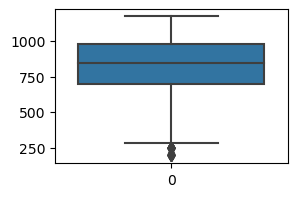

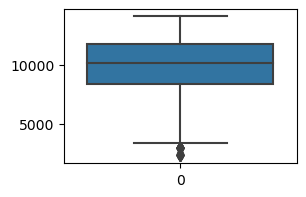

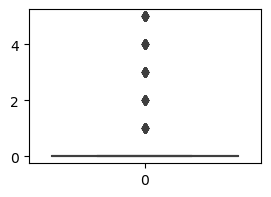

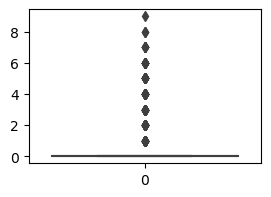

In [25]:
#Here we can chech the outliers with the help of boxplot
plt.figure(figsize=(3,2))
sns.boxplot(df["Monthly_Charges"])
plt.show()

plt.figure(figsize=(3,2))
sns.boxplot(df["Yearly_Charge"])
plt.show()

plt.figure(figsize=(3,2))
sns.boxplot(df["Admin_Tickets"])
plt.show()

plt.figure(figsize=(3,2))
sns.boxplot(df["Tech_Tickets"])
plt.show()

**Analysis:-**

1-This columns contains an outliers so we will remove this oulier for next steps.

2-This outliers are also responsible for decresing accuracy of the model;

In [26]:
df.columns #Check col of the datasets

Index(['Gender', 'Tenure', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Monthly_Charges', 'Yearly_Charge', 'Admin_Tickets',
       'Tech_Tickets', 'Churn'],
      dtype='object')

**This operation comes under the data Transformation basically on this operation we generally to overcome outliers present within a col**

In [27]:

df["zs-Monthly_Charges"] = (df["Monthly_Charges"]-df["Monthly_Charges"].mean())/df["Monthly_Charges"].std()

df["zs-Yearly_Charge"] = (df["Yearly_Charge"]-df["Yearly_Charge"].mean())/df["Yearly_Charge"].std()

df["zs-Admin_Tickets"] = (df["Admin_Tickets"]-df["Admin_Tickets"].mean())/df["Admin_Tickets"].std()

df["zs-Tech_Tickets"] = (df["Tech_Tickets"]-df["Tech_Tickets"].mean())/df["Tech_Tickets"].std()
 


In [28]:
df.head()

,Gender,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn,zs-Monthly_Charges,zs-Yearly_Charge,zs-Admin_Tickets,zs-Tech_Tickets
0,Male,1,No,No phone service,DSL,396.5,4758,0,0,Yes,-1.688004,-1.688004,-0.396445,-0.442608
1,Female,71,Yes,Yes,Fiber optic,963.5,11562,0,0,No,0.696418,0.696418,-0.396445,-0.442608
2,Male,2,Yes,No,Fiber optic,955.0,11460,0,0,No,0.660673,0.660673,-0.396445,-0.442608
3,Male,1,Yes,No,DSL,452.5,5430,0,0,No,-1.452505,-1.452505,-0.396445,-0.442608
4,Female,43,Yes,Yes,Fiber optic,902.5,10830,0,0,No,0.439893,0.439893,-0.396445,-0.442608


In [29]:
df["zs-Monthly_Charges"].max()

1.5837424601214736

In [30]:
df["zs-Yearly_Charge"].max()

1.583742460121473

In [31]:
df["zs-Admin_Tickets"].max()

3.4529992195686696

In [32]:
df["zs-Tech_Tickets"].max()

5.354312193289222

In [33]:
df = df[df["zs-Monthly_Charges"]<1]
df = df[df["zs-Yearly_Charge"]<1]
df = df[df["zs-Admin_Tickets"]<1]
df = df[df["zs-Tech_Tickets"]<1]

**Afer transforming operation of the current col here you can see hte ouliers present on the columns are much lessr than the previous**

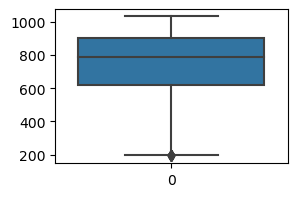

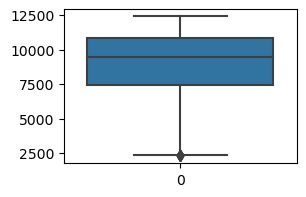

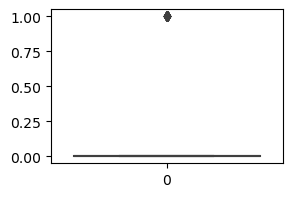

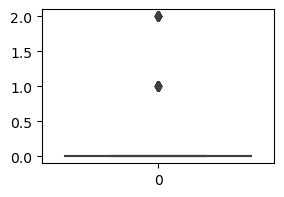

In [34]:

plt.figure(figsize=(3,2))
sns.boxplot(df["Monthly_Charges"])
plt.show()

plt.figure(figsize=(3,2))
sns.boxplot(df["Yearly_Charge"])
plt.show()

plt.figure(figsize=(3,2))
sns.boxplot(df["Admin_Tickets"])
plt.show()

plt.figure(figsize=(3,2))
sns.boxplot(df["Tech_Tickets"])
plt.show()

In [35]:

df.drop("zs-Admin_Tickets",inplace=True,axis=1)


In [36]:
df.drop("zs-Tech_Tickets",inplace=True,axis=1)


<Axes: >

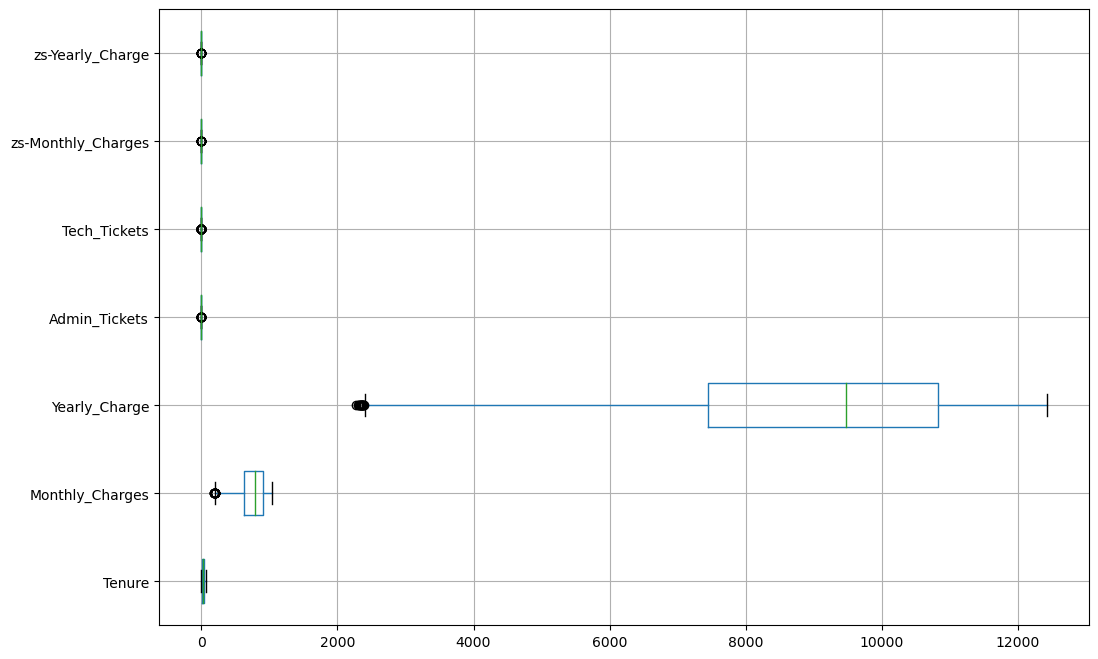

In [37]:
plt.figure(figsize=(12,8))
df.boxplot(vert=0)

**Analysis:-**

1-On this whole process we have to normalize the ouliers to perfoam different operation like using mean divide by stand     deviation

2-Those value comes for that process we have find the maximun ang take range value which will decreses by 1. 

# <div style="color:white;display:fill;border-radius:5px;background-color:#60e945;font-family:Didot;overflow:hidden"><p style="padding:20px;color:Black;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>5 |</b>Data Visualisation</p></div>
<a id="5"></a>

&nbsp;&nbsp;&nbsp;&nbsp;**Official Documentation Of Data Visualisation:** <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://www.analyticsvidhya.com/blog/2021/04/a-complete-beginners-guide-to-data-visualization/<br>

C:\Users\USER\AppData\Local\Temp\ipykernel_2548\2899369946.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(df.corr(),annot=True,cmap='viridis')#heat map basically helping us to find the correlation between columns


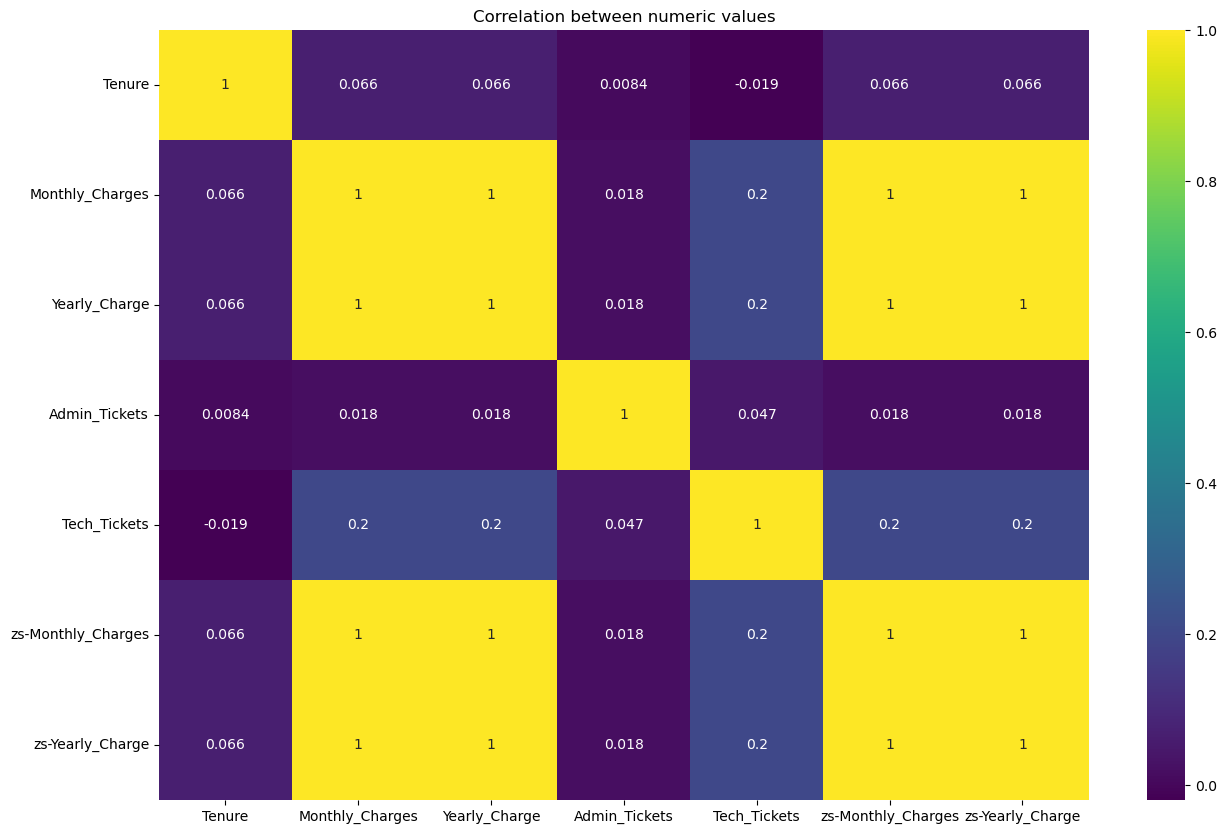

In [38]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(df.corr(),annot=True,cmap='viridis')#heat map basically helping us to find the correlation between columns
heatmap.set_title("Correlation between numeric values")
plt.show()

<Axes: xlabel='Tenure', ylabel='Density'>

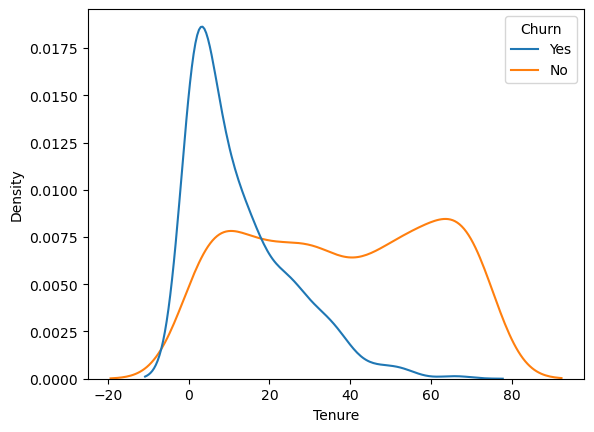

In [39]:
sns.kdeplot(x=df['Tenure'],hue=df['Churn'])

**Analysis:-**

1-This datsets is looks imbalanced dataset

2-If you see the realtion ship between tenure and churning.The lesser the tenure more are the chances to churn,so one of the     ways to reduce customer churning would be to retain customers for longer tenure,so it reduce the chances of churning

In [40]:
df.head()

,Gender,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn,zs-Monthly_Charges,zs-Yearly_Charge
0,Male,1,No,No phone service,DSL,396.5,4758,0,0,Yes,-1.688004,-1.688004
1,Female,71,Yes,Yes,Fiber optic,963.5,11562,0,0,No,0.696418,0.696418
2,Male,2,Yes,No,Fiber optic,955.0,11460,0,0,No,0.660673,0.660673
3,Male,1,Yes,No,DSL,452.5,5430,0,0,No,-1.452505,-1.452505
4,Female,43,Yes,Yes,Fiber optic,902.5,10830,0,0,No,0.439893,0.439893


<Axes: xlabel='Tenure', ylabel='count'>

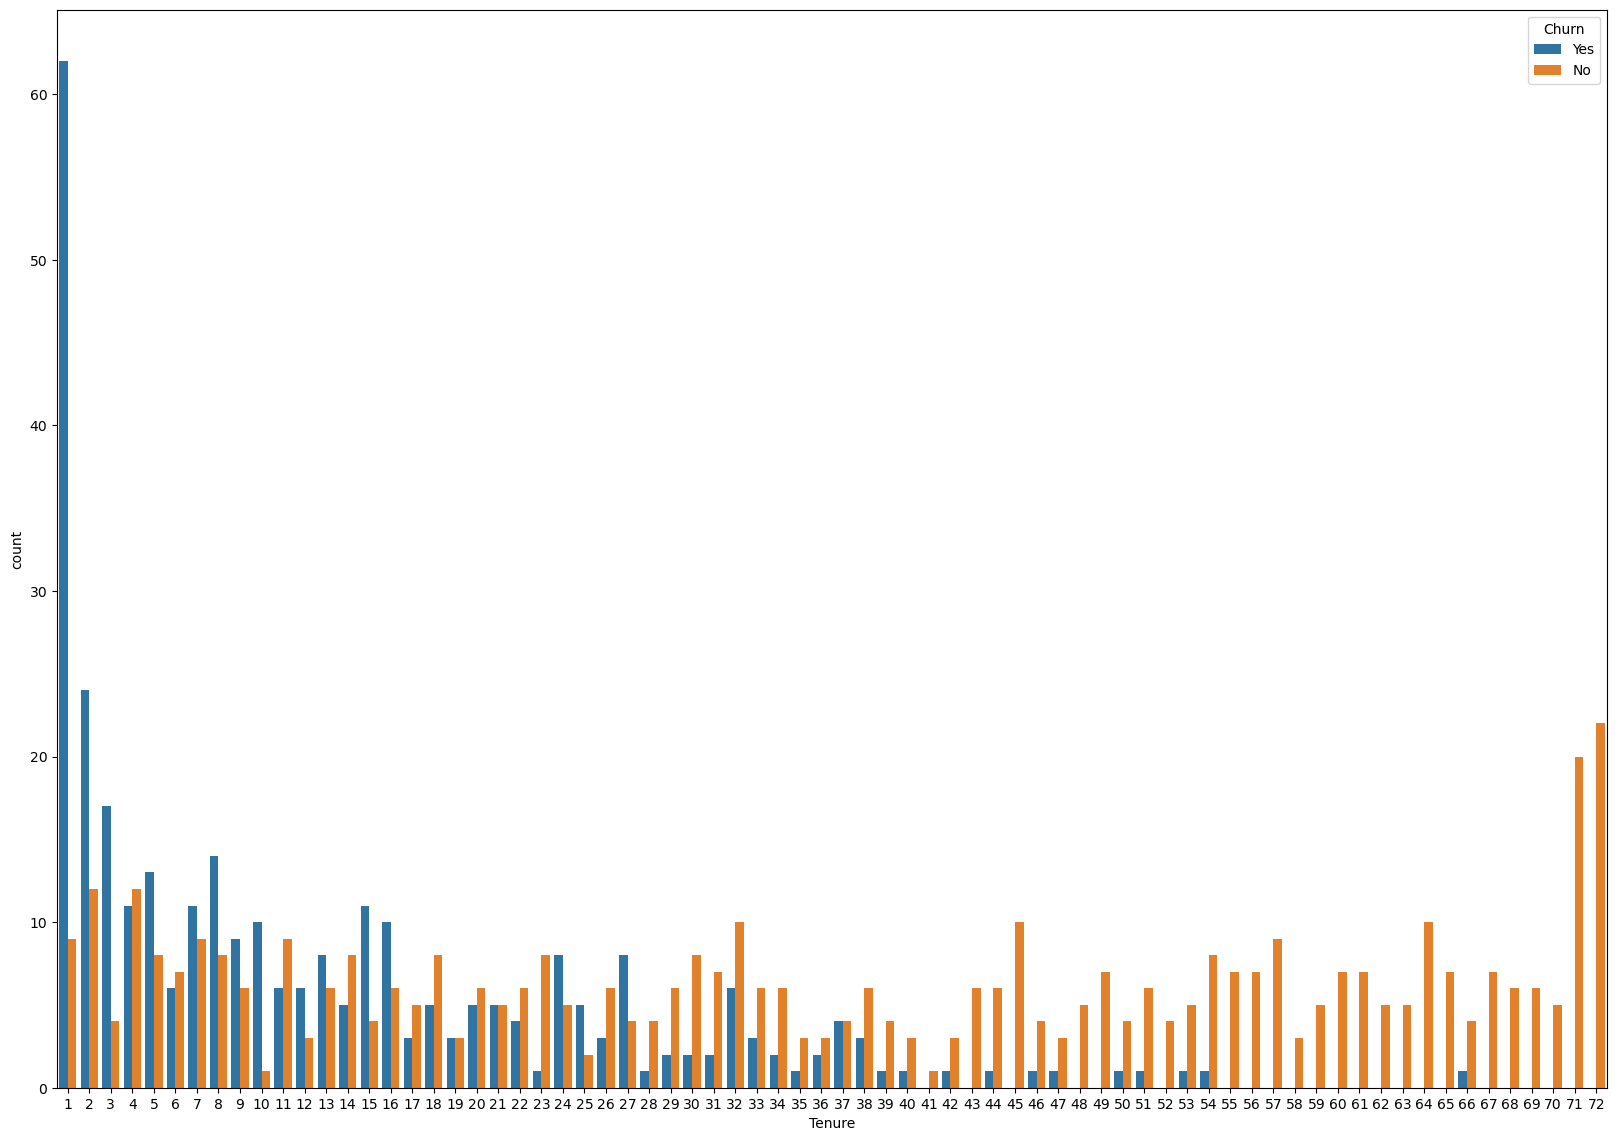

In [41]:
plt.figure(figsize=(20,14))
sns.countplot(x=df['Tenure'],hue=df['Churn'])

**On the Stared Tenure affect churn a lot means the customer stayes more than 3 to 5 years so they highly going with churn
and if the customer are stayed 4 to 5 month or lesser they means they not going with churn**

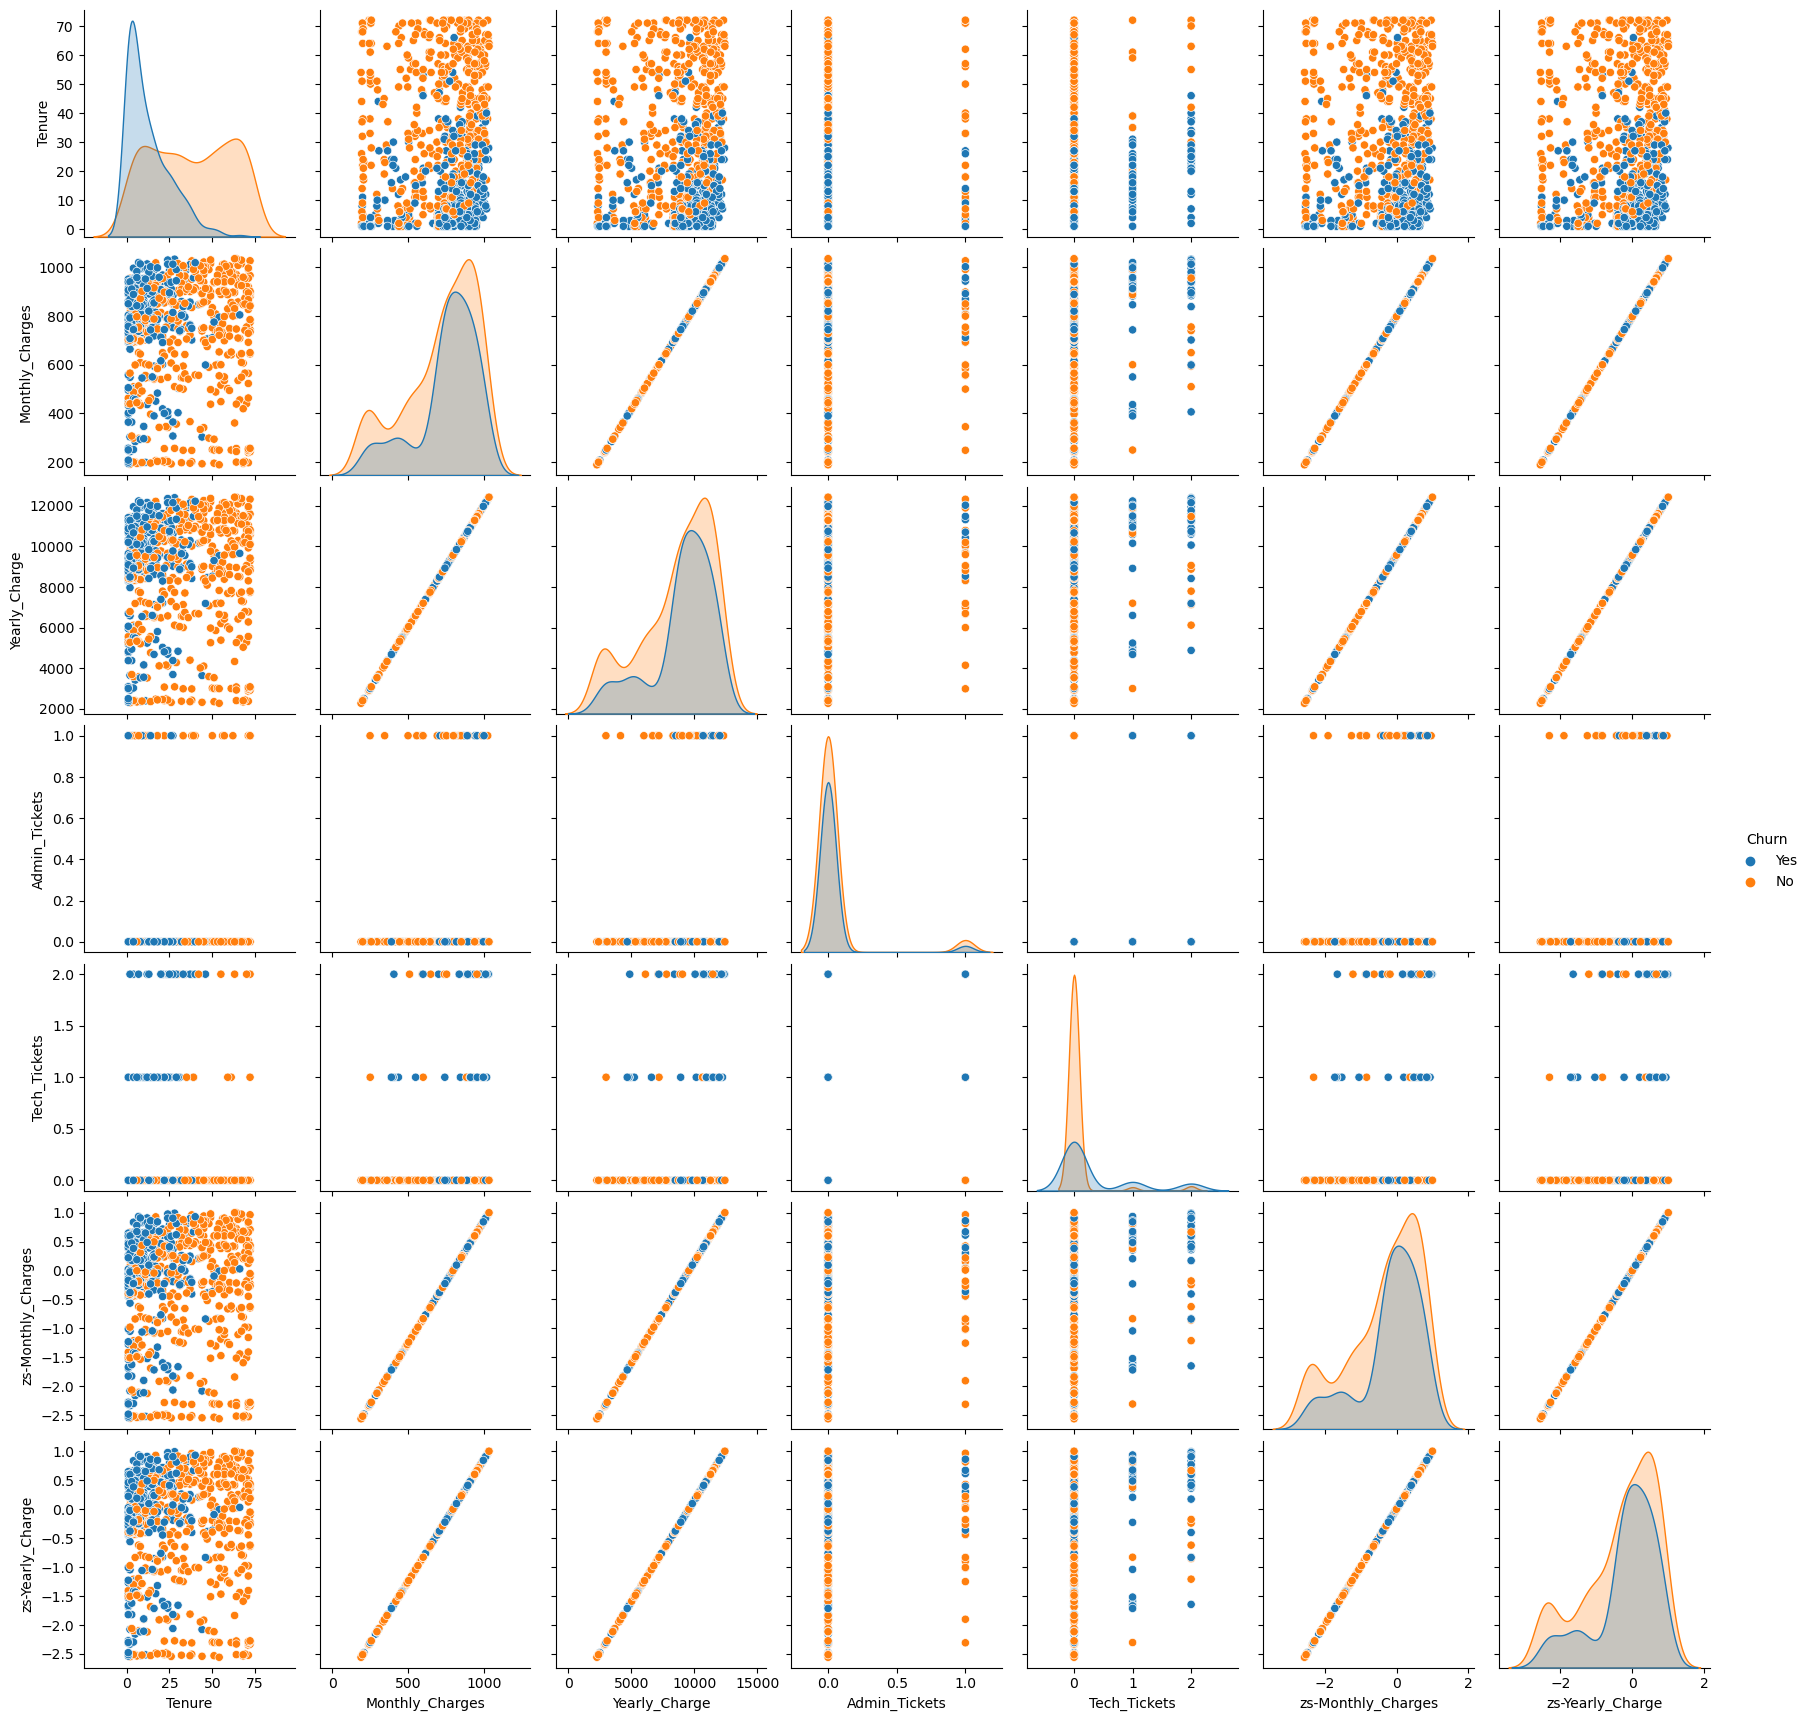

In [42]:
sns.pairplot(df,hue='Churn') #here you can see the behaviour of the data with respect to Churn Column

<Axes: xlabel='Churn', ylabel='Tech_Tickets'>

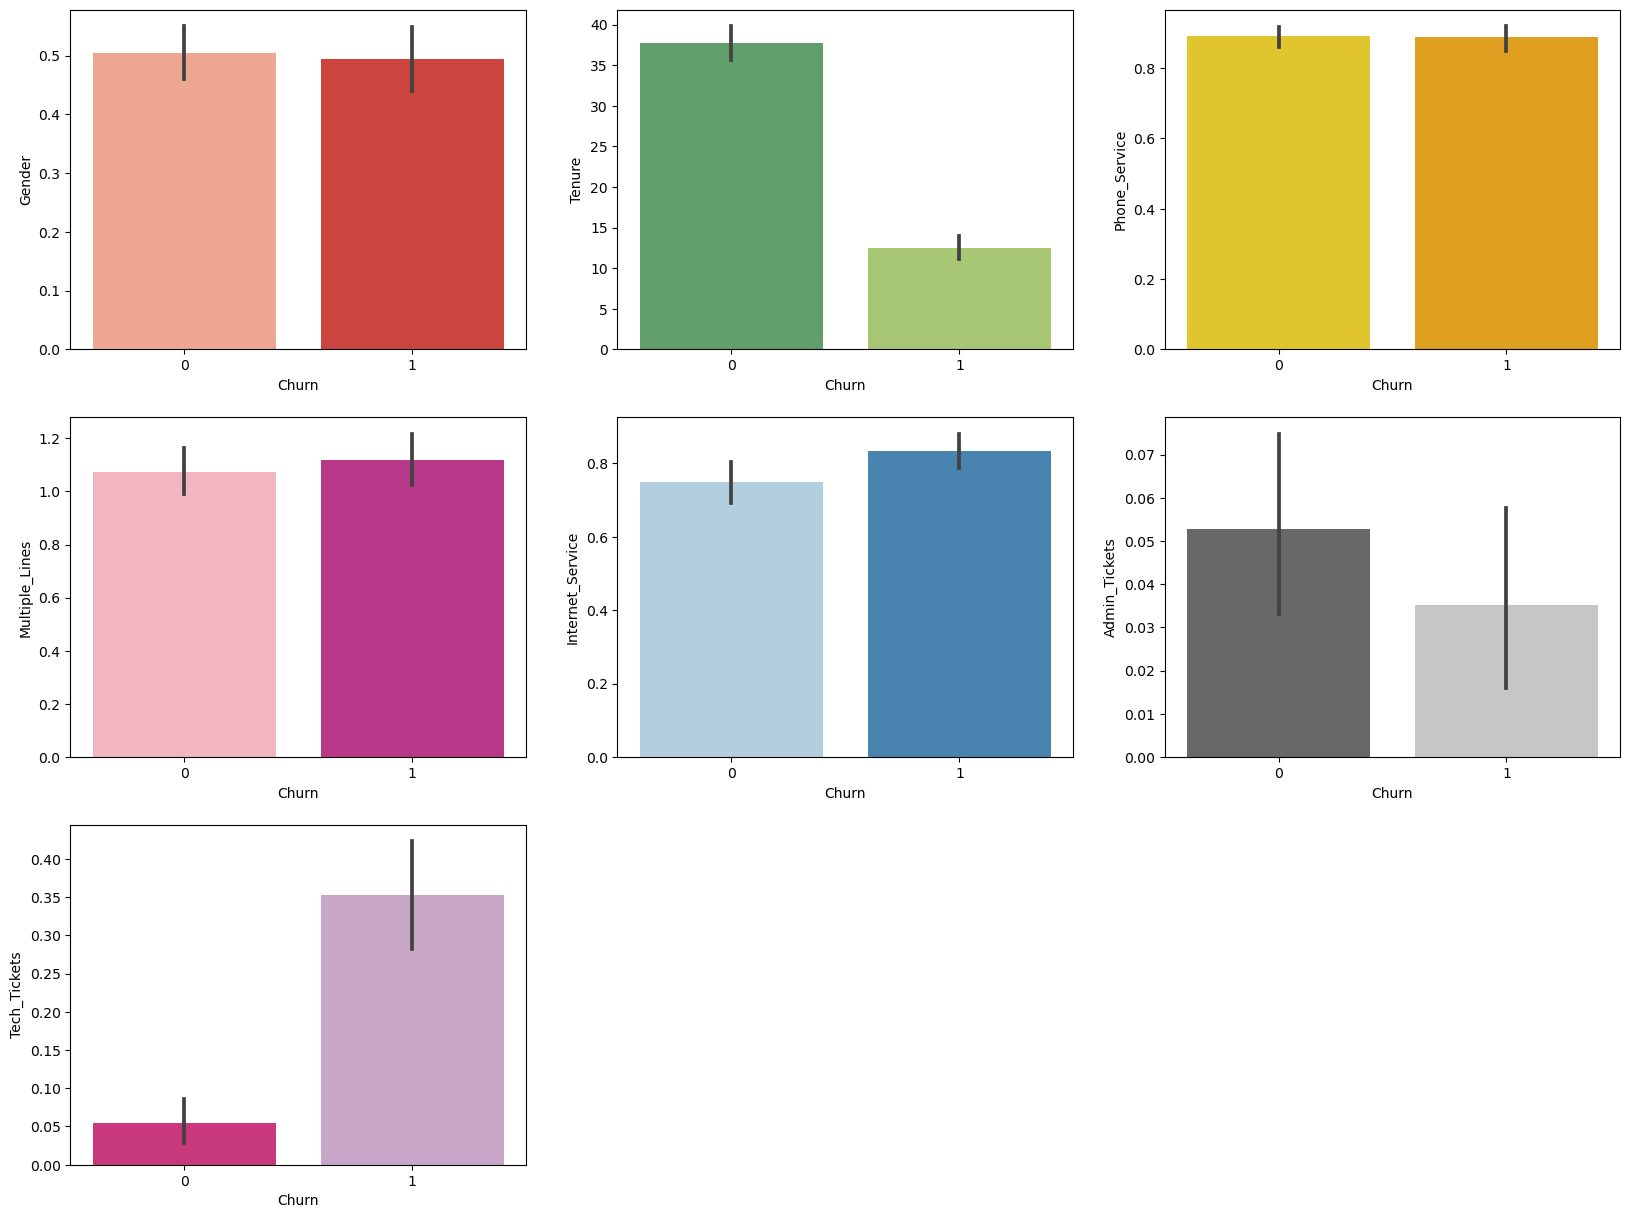

In [126]:
plt.figure(figsize=(20,15)) #barpots of columns

plt.subplot(3,3,1)
sns.barplot(x='Churn',y='Gender', data=df, palette="Reds")

plt.subplot(3,3,2)
sns.barplot(x='Churn',y='Tenure', data=df , palette='summer')

plt.subplot(3,3,3)
sns.barplot(x='Churn',y='Phone_Service',data=df,palette='Wistia')

plt.subplot(3,3,4)
sns.barplot(x='Churn',y='Multiple_Lines',data=df,palette='RdPu')

plt.subplot(3,3,5)
sns.barplot(x='Churn',y='Internet_Service',data=df,palette='Blues')

plt.subplot(3,3,6)
sns.barplot(x='Churn',y='Admin_Tickets',data=df,palette='Greys_r')

plt.subplot(3,3,7)
sns.barplot(x='Churn',y='Tech_Tickets',data=df,palette='PuRd_r')

**Analysis:-**

1-Tech_Tickets also responsible for Churn,if the Query of employees are not get solved with timming so the employees are not stayed of that company

2-If you can admin tickets affect churn

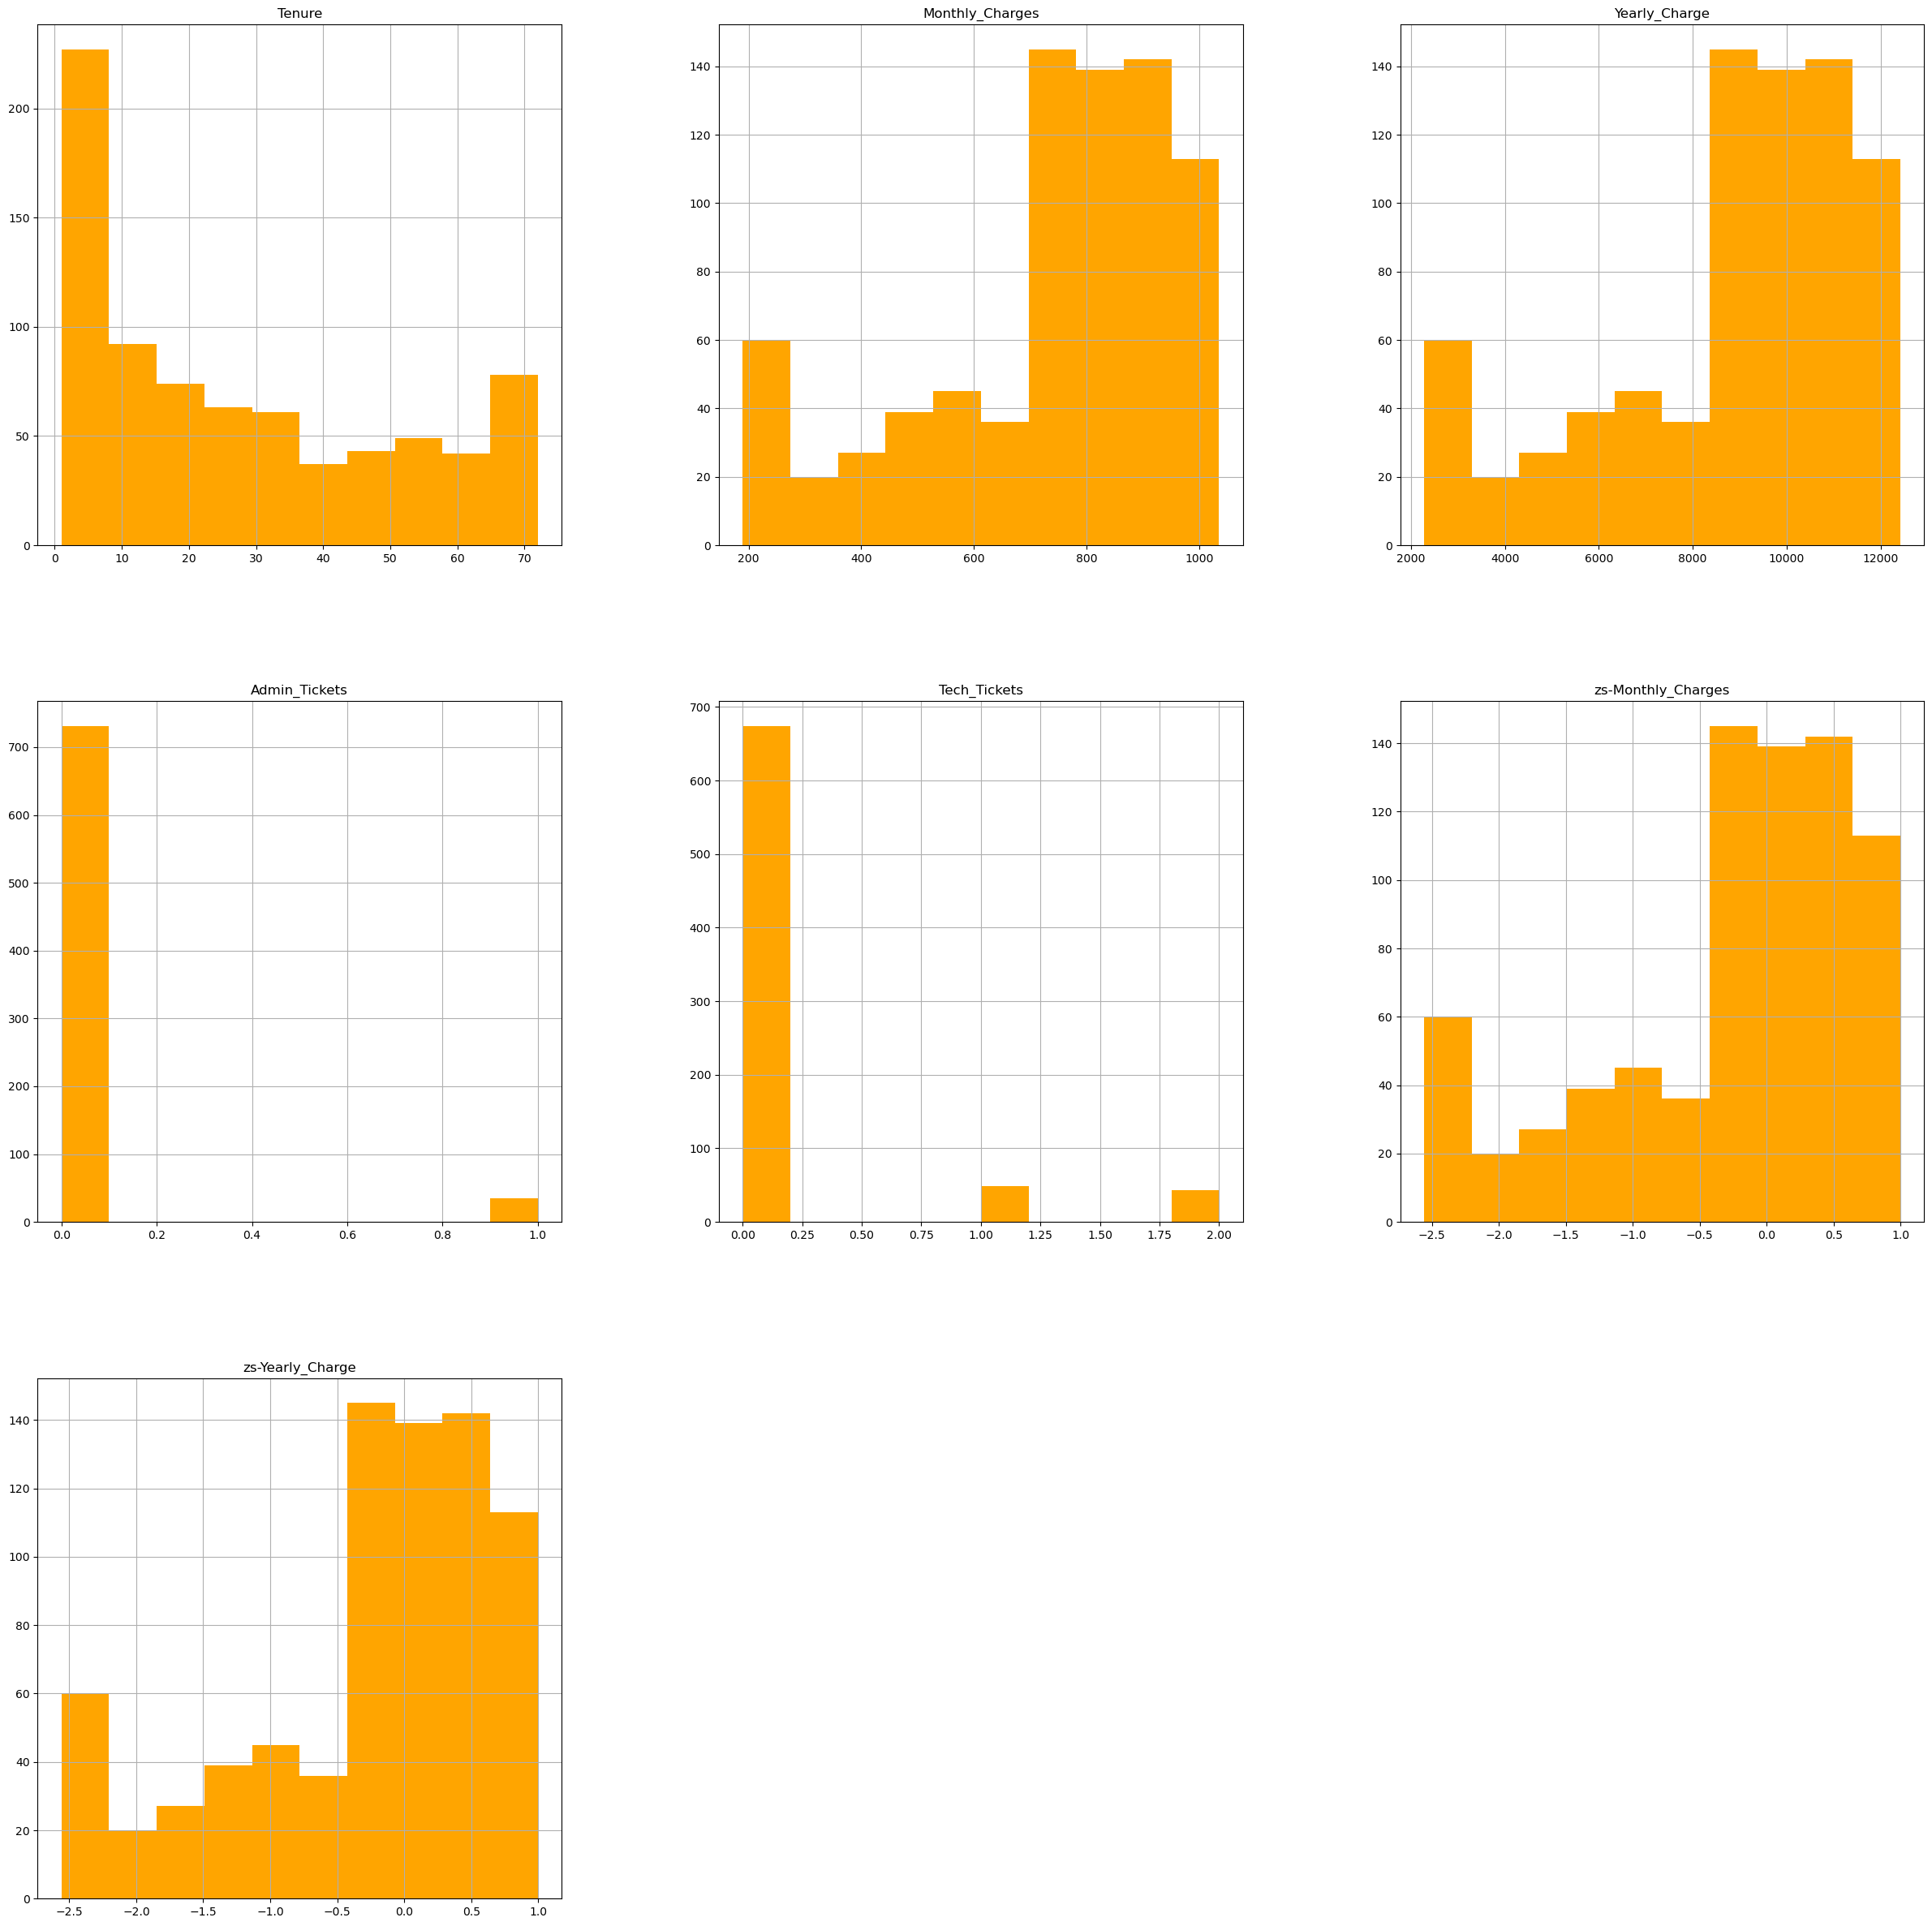

In [43]:
df.hist(figsize = (30,30), color = 'orange')
plt.show()   #Histogram plots of all the columns


Text(0.5, 1.0, 'Tech_Tickets')

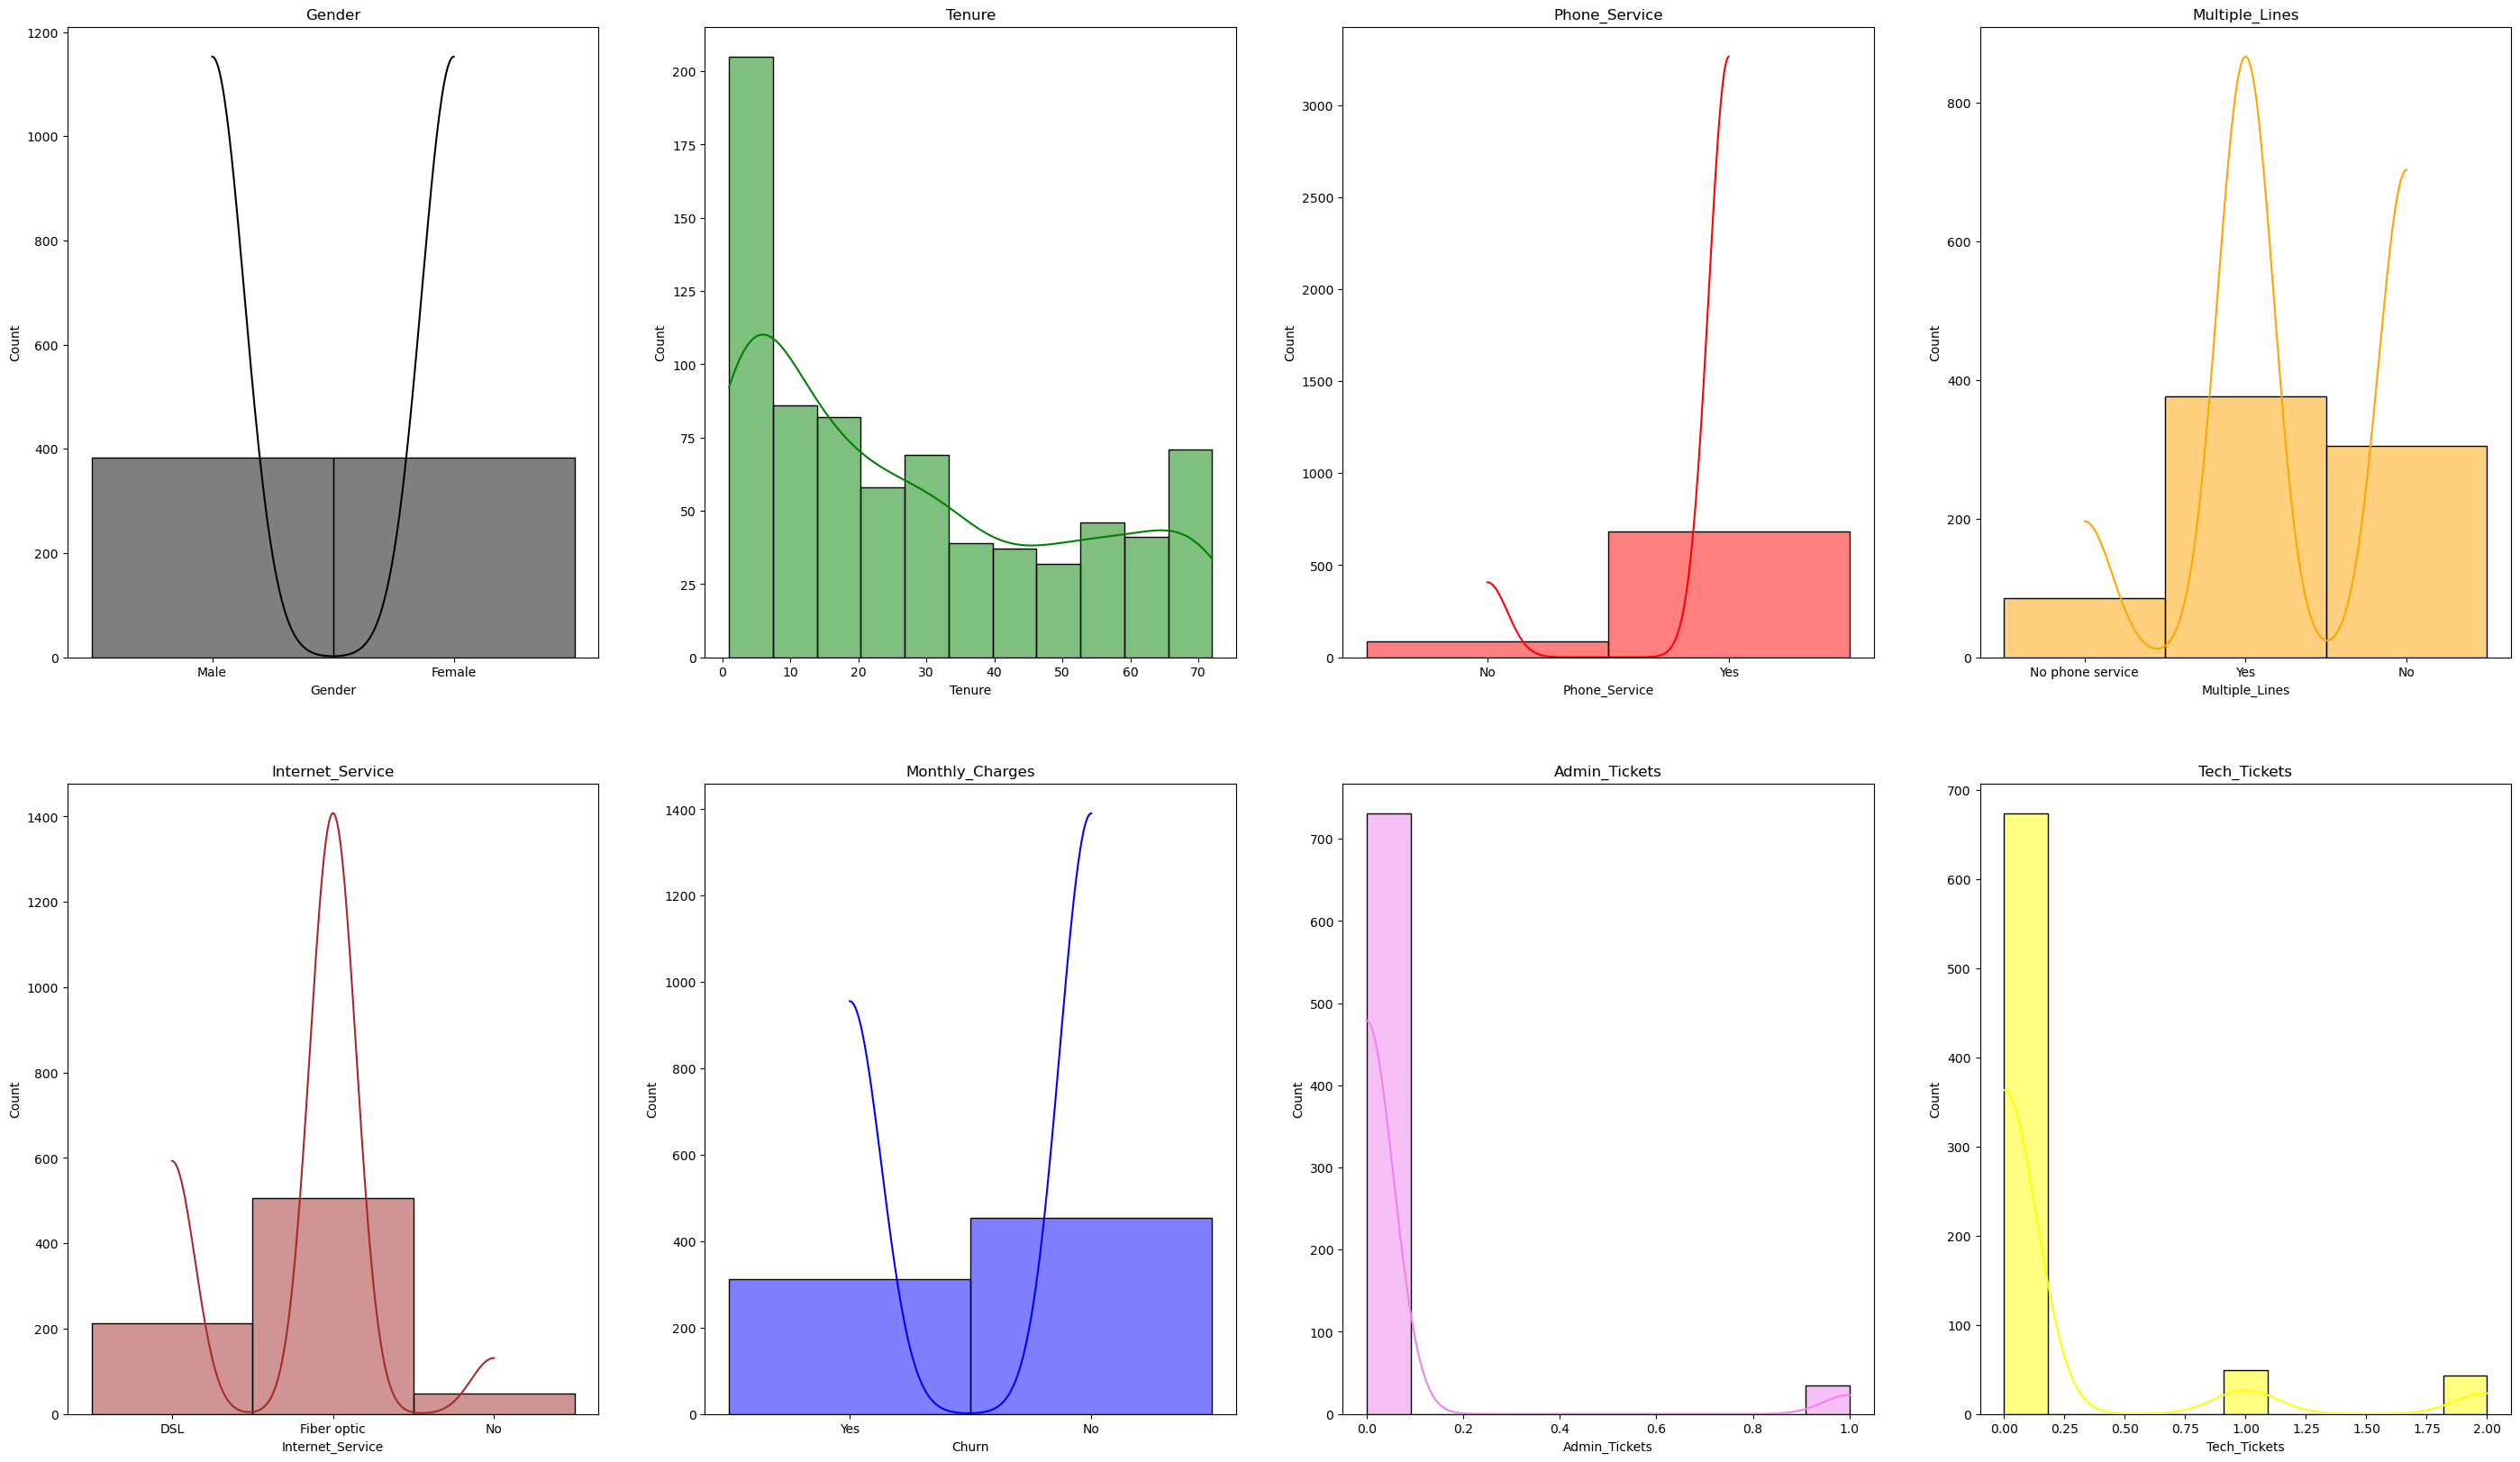

In [44]:
plt.figure(figsize=(35,20)) #Histogram plots of all categories colunms

plt.subplot(2,4,1)
sns.histplot(df['Gender'],color='black',kde=True).set_title('Gender')

plt.subplot(2,4,2)
sns.histplot(df['Tenure'],color='green',kde=True).set_title('Tenure')

plt.subplot(2,4,3)
sns.histplot(df['Phone_Service'],color='red',kde=True).set_title('Phone_Service')

plt.subplot(2,4,4)
sns.histplot(df['Multiple_Lines'],color='orange',kde=True).set_title('Multiple_Lines')

plt.subplot(2,4,5)
sns.histplot(df['Internet_Service'],color='brown',kde=True).set_title('Internet_Service')

plt.subplot(2,4,6)
sns.histplot(df['Churn'],color='blue',kde=True).set_title('Monthly_Charges')

plt.subplot(2,4,7)
sns.histplot(df['Admin_Tickets'],color='violet',kde=True).set_title('Admin_Tickets')

plt.subplot(2,4,8)
sns.histplot(df['Tech_Tickets'],color='yellow',kde=True).set_title('Tech_Tickets')

# <div style="color:white;display:fill;border-radius:5px;background-color:#60e945;font-family:Didot;overflow:hidden"><p style="padding:20px;color:Black;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>6 |</b>Feature Engineering</p></div>
<a id="6"></a>

&nbsp;&nbsp;&nbsp;&nbsp;**Official Documentation Of Feature Engineering:** <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://www.analyticsvidhya.com/blog/2021/03/step-by-step-process-of-feature-engineering-for-machine-learning-algorithms-in-data-science/<br>


### 1. Label Encoding:
- Encode target labels with value between 0 and n_classes-1.
- This transformer should be used to encode target values, i.e. y, and not the input X.

 ## <font color=32CD32>Label Encoding </font>

In [45]:
le = preprocessing.LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])#In this operation we perfoam label encoding
df['Phone_Service']=le.fit_transform(df['Phone_Service'])
df['Multiple_Lines']=le.fit_transform(df['Multiple_Lines'])
df['Internet_Service']=le.fit_transform(df['Internet_Service'])
df['Churn']=le.fit_transform(df['Churn'])


In [46]:
df.head()

,Gender,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn,zs-Monthly_Charges,zs-Yearly_Charge
0,1,1,0,1,0,396.5,4758,0,0,1,-1.688004,-1.688004
1,0,71,1,2,1,963.5,11562,0,0,0,0.696418,0.696418
2,1,2,1,0,1,955.0,11460,0,0,0,0.660673,0.660673
3,1,1,1,0,0,452.5,5430,0,0,0,-1.452505,-1.452505
4,0,43,1,2,1,902.5,10830,0,0,0,0.439893,0.439893


***Plz ingore last two columns it is a part of feature Tranformation so that is not compulsary for analysis***

# <div style="color:white;display:fill;border-radius:5px;background-color:#60e945;font-family:Didot;overflow:hidden"><p style="padding:20px;color:Black;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>7 |</b>Train Test Split And Scaling Method</p></div>
<a id="7"></a>

## Why scaling is needed?

1. To give equal important to all features(mean feature with high mangitudes should not get more weightage)
2. To converge faster or for faster mathematical operations. 

&nbsp;&nbsp;&nbsp;&nbsp;**Official Documentation Of Feature Scaling:** <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/<br>



In [47]:
# select independent variables
X = df.drop(columns='Churn')

# select dependent variables
y = df.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['Gender', 'Tenure', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Monthly_Charges', 'Yearly_Charge', 'Admin_Tickets',
       'Tech_Tickets', 'zs-Monthly_Charges', 'zs-Yearly_Charge'],
      dtype='object')
Churn


In [48]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=40, shuffle=True)

In [49]:
X_train.head()#after train test splitting operation you can see the given table

,Gender,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,zs-Monthly_Charges,zs-Yearly_Charge
557,1,2,1,0,1,742.0,8904,0,0,-0.235062,-0.235062
1101,0,45,1,0,1,857.0,10284,0,0,0.248550,0.248550
724,1,69,1,2,0,741.0,8892,0,0,-0.239268,-0.239268
1074,0,72,1,2,0,841.0,10092,0,0,0.181265,0.181265
920,1,69,0,1,0,565.5,6786,0,0,-0.977303,-0.977303


## Standard Scaler (Standardization)
- Std  dev =1 and mean = 0
- Standardization assumes that your observations fit a Gaussian distribution (Normal distribution) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

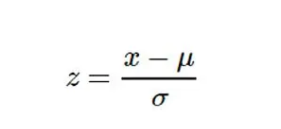

In [50]:
scaler = StandardScaler()

In [51]:
scaled_df=scaler.fit_transform(X_train)
scaled_df


array([[ 1.01757604, -1.08482976,  0.35112344, ..., -0.33265279,
         0.07727209,  0.07727209],
       [-0.98272754,  0.76880597,  0.35112344, ..., -0.33265279,
         0.57405619,  0.57405619],
       [ 1.01757604,  1.80339335,  0.35112344, ..., -0.33265279,
         0.07295223,  0.07295223],
       ...,
       [ 1.01757604, -0.39510484,  0.35112344, ...,  1.74281137,
         0.99524271,  0.99524271],
       [-0.98272754, -0.48132045,  0.35112344, ..., -0.33265279,
         0.5330175 ,  0.5330175 ],
       [ 1.01757604,  1.93271678, -2.84800125, ..., -0.33265279,
        -0.34391443, -0.34391443]])



## Min Max Scaler (Normalization)

- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution(Normal distribution). 

- range is  0 to 1

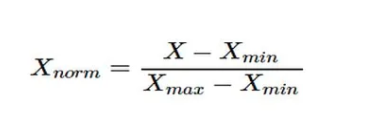

In [52]:
scaler = MinMaxScaler() 

scaled_df = scaler.fit_transform(df)
scaled_df

array([[1.        , 0.        , 0.        , ..., 1.        , 0.24482555,
        0.24482555],
       [0.        , 0.98591549, 1.        , ..., 0.        , 0.91543465,
        0.91543465],
       [1.        , 0.01408451, 1.        , ..., 0.        , 0.90538143,
        0.90538143],
       ...,
       [1.        , 0.76056338, 1.        , ..., 0.        , 0.48551153,
        0.48551153],
       [1.        , 0.        , 1.        , ..., 1.        , 0.67179184,
        0.67179184],
       [1.        , 0.04225352, 1.        , ..., 1.        , 0.65582496,
        0.65582496]])

**Im using stanadard scaler or min max scaler only for imporiving accuracy score** 

#  <div style="color:white;display:fill;border-radius:5px;background-color:#60e945;font-family:Didot;overflow:hidden"><p style="padding:20px;color:Black;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>8 |</b>Machine Learning</p></div>
<a id="8"></a>

&nbsp;&nbsp;&nbsp;&nbsp;**Friendly Documentation Of Machine learning:** <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://www.analyticsvidhya.com/machine-learning/ <br>

&nbsp;&nbsp;&nbsp;&nbsp;**Friendly Documentation Of Confusion metrix:** <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://www.analyticsvidhya.com/blog/2021/05/in-depth-understanding-of-confusion-matrix/#:~:text=Elements%20of%20Confusion%20Matrix&text=Let's%20define%20them%20one%20by,known%20as%20Type%20I%20Error. <br>





# 1-CONFUSION MATRIX


## 2. False Positive Rate | Type I error
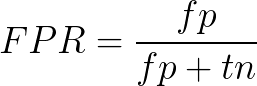


## 3. False Negative Rate | Type II error
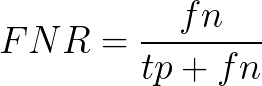


## 4. True Negative Rate | Specificity
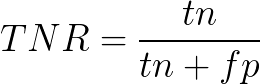
- When you really want to be sure that you are right when you say something is safe. A typical example would be a doctor telling a patient “you are healthy”. Making a mistake here and telling a sick person they are safe and can go home is something you may want to avoid.


## 5. True Positive Rate | Recall | Sensitivity
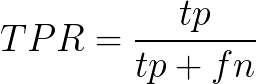

- That being said, recall is a go-to metric, when you really care about catching all fraudulent transactions even at a cost of false alerts. Potentially it is cheap for you to process those alerts and very expensive when the transaction goes unseen.


## 6. Positive Predictive Value | Precision

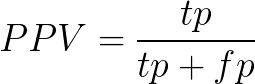

- When raising false alerts is costly, when you want all the positive predictions to be worth looking at you should optimize for precision.


## 7. Accuracy
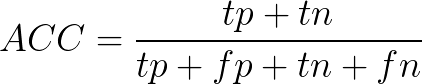


## 8. F1 score
- It is used when you have a imbalance dataset

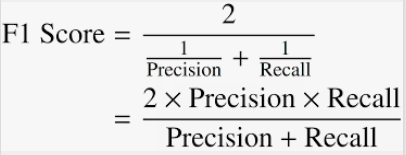


# <font color=#32CD32>Logistic Regression</font>

In [53]:
from sklearn.linear_model import LogisticRegression


In [54]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred = clf.predict(X_test)

In [56]:
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.7916666666666666


# <font color=#32CD32>Confusion matrix</font>

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[88, 20],
       [20, 64]], dtype=int64)

<Axes: >

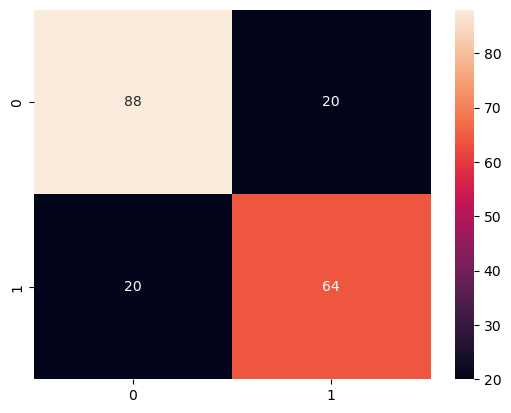

In [58]:
sns.heatmap(cm,annot=True)

# <font color=#32CD32>Classification Report</font>

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.76      0.76      0.76        84

    accuracy                           0.79       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.79      0.79      0.79       192



# <font color=#32CD32>KNN(K Nearest Neighbors)</font>

In [61]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn= KNeighborsClassifier()

In [62]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
y_knn_pred = clf_knn.predict(X_test)

In [64]:
accracy = clf_knn.score(X_test,y_test)
print(accracy)

0.6041666666666666


# <font color=#32CD32>Confusion matrix</font>

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_knn_pred)
cm

array([[76, 32],
       [44, 40]], dtype=int64)

<Axes: >

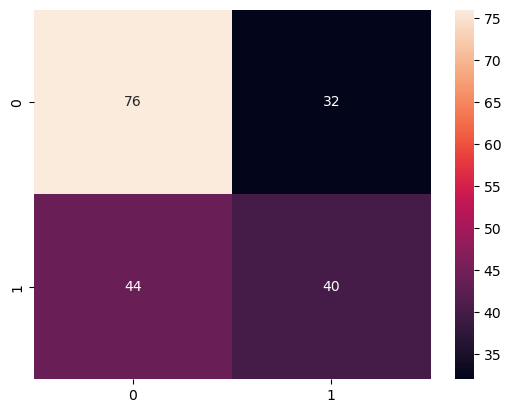

In [66]:
sns.heatmap(cm,annot=True)

# <font color=#32CD32>Classification Report</font>

In [67]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           0       0.63      0.70      0.67       108
           1       0.56      0.48      0.51        84

    accuracy                           0.60       192
   macro avg       0.59      0.59      0.59       192
weighted avg       0.60      0.60      0.60       192



# <font color=#32CD32>Support Vector Machine</font>

In [68]:
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train, y_train)

SVC()

In [69]:
y_svc_pred = clf_svm.predict(X_test) 

In [70]:
accuracy =clf_svm.score(X_test, y_test) 
print(accuracy)

0.5625


# <font color=#32CD32>Confusion Matrix</font>

In [71]:
cm = confusion_matrix(y_test, y_svc_pred)
cm

array([[108,   0],
       [ 84,   0]], dtype=int64)

<Axes: >

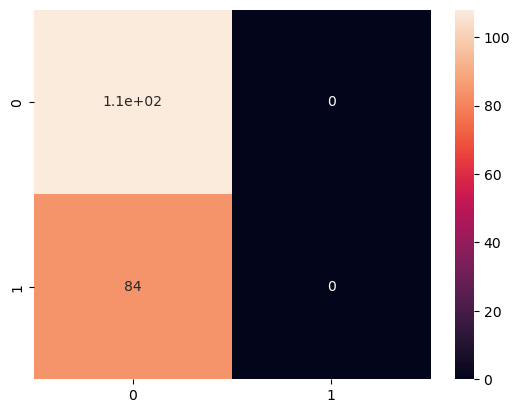

In [72]:
sns.heatmap(cm,annot=True)

# <font color=#32CD32>Classification Report</font>

In [73]:
print(classification_report(y_test,y_svc_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       108
           1       0.00      0.00      0.00        84

    accuracy                           0.56       192
   macro avg       0.28      0.50      0.36       192
weighted avg       0.32      0.56      0.40       192



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# <font color=#32CD32>Decision Tree</font>

In [74]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [75]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
y_dt_pred = dt.predict(X_test)

In [77]:
accuracy = dt.score(X_test, y_test)
accuracy

0.7135416666666666

# <font color=#32CD32>Confusion Matrix</font>

<Axes: >

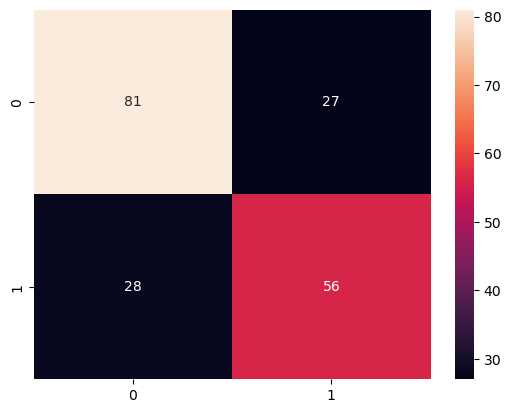

In [79]:
sns.heatmap(cm,annot=True)

# <font color=#32CD32>Classifiaction Report</font>

In [80]:
print(classification_report(y_test,y_dt_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       108
           1       0.67      0.67      0.67        84

    accuracy                           0.71       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.71      0.71      0.71       192



# <font color=#32CD32>Naive_bayes</font>

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [83]:
y_nb_pred = NB.predict(X_test)

In [84]:
accuracy = NB.score(X_test, y_test)
print(accuracy)

0.75


# <font color=#32CD32>Confusion matrix</font>

In [85]:
cm = confusion_matrix(y_test, y_nb_pred)
cm

array([[80, 28],
       [20, 64]], dtype=int64)

<Axes: >

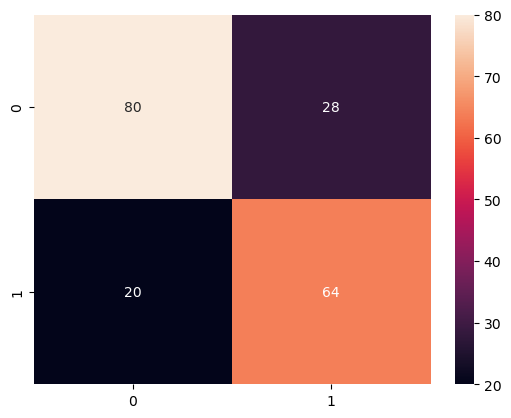

In [86]:
sns.heatmap(cm,annot=True)

# <font color=#32CD32>Classification Report</font>

In [87]:
print(classification_report(y_test,y_nb_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       108
           1       0.70      0.76      0.73        84

    accuracy                           0.75       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.75      0.75      0.75       192



# <font color=#32CD32>Random Forest</font>

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [89]:
Rf = RandomForestClassifier(n_estimators = 4)
Rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4)

In [90]:
y_rf_pred = Rf.predict(X_test)

In [91]:
accuracy = Rf.score(X_test, y_test)
print(accuracy)

0.703125


# <font color=#32CD32>Confusion metrix</font>

In [92]:
cm = confusion_matrix(y_test, y_rf_pred)
cm

array([[85, 23],
       [34, 50]], dtype=int64)

<Axes: >

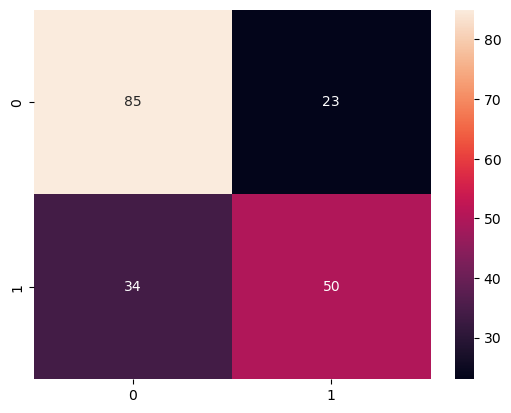

In [93]:
sns.heatmap(cm,annot=True)

# <font color=#32CD32>Classification Report</font>

In [94]:
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       108
           1       0.68      0.60      0.64        84

    accuracy                           0.70       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.70      0.70      0.70       192



# <font color=#32CD32>Here We Apply Some Boosting Techniques To Enchance My Model</font>

 **Ada Boost Classifier**

In [95]:
from sklearn.ensemble import AdaBoostClassifier #Ada boost Classifier
from sklearn.datasets import make_classification
ada = AdaBoostClassifier()

In [96]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [97]:
y_ada_pred = ada.predict(X_test)

In [98]:
accuracy = ada.score(X_test, y_test)
print(accuracy)

0.7916666666666666


 **Gradient Bossting**

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
xgb = GradientBoostingClassifier()

In [101]:
xgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [102]:
accuracy = xgb.score(X_test, y_test)
print(accuracy)

0.7760416666666666


# <div style="color:white;display:fill;border-radius:5px;background-color:#60e945;font-family:Didot;overflow:hidden"><p style="padding:20px;color:Black;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>9 |</b>Final Prediction</p></div>
<a id="9"></a>

In [103]:
print("Logistic Regression:" , clf.score(X_test,y_test))
print("KNN:" , clf_knn.score(X_test,y_test))
print("Support Vector Meachine:", clf_svm.score(X_test, y_test))
print("Decission Tree:", dt.score(X_test, y_test))
print("Naive Bayes:", NB.score(X_test, y_test))
print("Ensemble- Random Forest:", Rf.score(X_test, y_test))
print("Ada boost:",ada.score(X_test, y_test))
print("Gradient Boosting",xgb.score(X_test, y_test))

Logistic Regression: 0.7916666666666666
KNN: 0.6041666666666666
Support Vector Meachine: 0.5625
Decission Tree: 0.7135416666666666
Naive Bayes: 0.75
Ensemble- Random Forest: 0.703125
Ada boost: 0.7916666666666666
Gradient Boosting 0.7760416666666666


# <div style="color:white;display:fill;border-radius:5px;background-color:#60e945;font-family:Didot;overflow:hidden"><p style="padding:20px;color:Black;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>10 |</b>Conclusion</p></div>
<a id="10"></a>

**1-In this telecom customer churn program, we aimed to address the critical challenge of customer churn in the telecom  industry. Churn, defined as the loss of customers or clients, can have significant financial implications for companies. Our goal was to create a predictive model to identify potential churners, allowing the telecom company to take proactive measures to retain valuable customers.**

**2-We started by importing the necessary libraries and loading the telecom churn dataset. Preprocessing steps were performed to handle missing values, encode categorical variables, and select relevant features. Feature engineering was also employed to create new informative features from the existing data.**

**3-The dataset was split into training and testing sets, and a RandomForestClassifier was chosen as the predictive model. The model was trained on the training data, and its performance was evaluated on the testing data using metrics such as accuracy, confusion matrix, and classification report.**

**4-The results of the model evaluation revealed its effectiveness in predicting customer churn. The accuracy score indicated the proportion of correct predictions, while the confusion matrix showed the number of true positive, true negative, false positive, and false negative predictions. The classification report provided further insights into precision, recall, and F1-score for both churn and non-churn classes.**

**5-By utilizing this trained model, the telecom company can predict whether a new customer is likely to churn or not. This prediction can be used to take appropriate actions, such as offering personalized retention offers, improved customer support, or incentives to encourage continued subscriptions. Implementing these measures can potentially reduce customer churn and lead to increased customer satisfaction and long-term commitment to the company.**

**6-It is important to note that this program is a simplified version of a real-world churn prediction system. In practice, more sophisticated models and feature engineering techniques can be explored. Additionally, the program could be integrated into a larger system that continuously collects and updates customer data, allowing the model to be retrained periodically to adapt to changing customer behaviors.**

**7-In conclusion, this telecom customer churn program serves as a valuable tool for telecom companies to better understand their customers and anticipate churn, ultimately aiding in fostering stronger customer relationships and enhancing business sustainability. By investing in customer retention efforts, companies can potentially save costs compared to continuously seeking new customers to replace the lost ones.**

**8-In the analysis of the dataset we analyze that the tenure,Admin tickets,or tech tickets all this factor all responsible for Churning of emplyees and if you are fixed that issues you will get to overcome churn rate of employees**

**If It Is Helpfull Support Them**

**Thank you**